# Predicting Income Inequality from U.S. Census Data

In this project, we will be utilizing data from [UCI’s Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/census%20income)
in order to predict income from U.S. census data.

We'll be using a random forest to filter through the values derived from our trees, and obtain our optimal classifier.

### Imports

We're going to be using pandas and sklearn for this functionality.

In [20]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## Investigating The Data

First we will read in the data and take a look at the initial values.

In [21]:
# reading in the income data to a df
income_data = pd.read_csv('income.csv', delimiter = ', ', header=0)

# printing the first
print(f'First income data point:\n{income_data.iloc[0]}')

# grabbing only the 'income' column for assigning our labels
labels = income_data[['income']]

First income data point:
age                          39
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education-num                13
marital-status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital-gain               2174
capital-loss                  0
hours-per-week               40
native-country    United-States
income                    <=50K
Name: 0, dtype: object


### Data Cleaning

In order for us to use our machine, we need to transform the data slightly. We'll be changing the `sex`, and `native-country`
columns to binary values.

In [22]:
# changing the 'sex' and 'country' columns to be binary values for ML
income_data['sex-int'] = income_data['sex'].apply(lambda x: 0 if x == 'Male' else 1)
income_data['country-int'] = income_data['native-country'].apply(lambda x: 0 if x == 'United-States' else 1)

# creating the 'data' section for our machine
data = income_data[['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex-int', 'country-int']]

## Building The Model

Now we can split the data into training and testing sets, default split is 75% training and 25% testing.
Then we can create our random forest and test it's performance on the set.

In [23]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

# creating the random forest, default is 100 trees
forest = RandomForestClassifier(random_state=1)
forest.fit(train_data, train_labels)

# printing the score of our forest
print(forest.score(test_data, test_labels))

0.8225033779633951


This score is pretty good, but let's see if we can't get a better one!

## Improving The Model

We change change the number of trees we name to determine the optimal number of
trees.

In [28]:
# creating a dict for our forest scores
forest_scores = {}
for i in range(10, 100):
    forest = RandomForestClassifier(random_state=1, n_estimators=i)
    forest.fit(train_data, train_labels)
    forest_scores[i] = forest.score(test_data, test_labels)

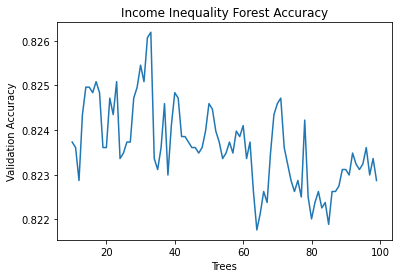

The best score (0.8261884289399337) comes from a forest with 33 trees!


In [29]:
plt.plot(*zip(*forest_scores.items()))
plt.xlabel('Trees')
plt.ylabel('Validation Accuracy')
plt.title('Income Inequality Forest Accuracy')
plt.show()

max_score = max(forest_scores.values())
print(f'The best score ({max_score}) comes from a forest with {max(forest_scores, key=forest_scores.get)} trees!')

In conclusion, we can predict whether someone will make over $50k based solely off census data with an accuracy of 83%!

#### Data Sources
Data is derived from the [UCI’s Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/census%20income).